# Import libraries + dataset

In [ ]:
import pandas as pd
import numpy as np
# import sklearn as sk
from datetime import timedelta
# from sklearn import model_selection, tree

In [13]:
filename = 'shot_logs.csv'
data = pd.read_csv(filename)
data = data.dropna() # SHOT_CLOCK originally has NaNs. I wonder why?
print(data.shape)
data.head()

(122502, 21)


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,6,2,8:15,9.1,2,...,18.4,2,missed,"Williams, Deron",101114,2.6,0,0,brian roberts,203148


In [14]:
data.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.225020e+05,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000
mean,2.140045e+07,0.252396,6.476164,2.471454,12.453344,1.989233,2.748202,13.443758,2.258363,159120.427977,4.121706,0.456156,1.005469,157334.912965
std,2.578228e+02,13.311418,4.681245,1.137898,5.763265,3.411188,2.957237,8.777113,0.437736,78689.677900,2.751587,0.498076,1.131129,79304.953702
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-100.500000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,200745.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.400000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.400000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,37.000000,7.000000,24.000000,32.000000,24.900000,43.500000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


In [15]:
# from https://stackoverflow.com/questions/50308629/python-pandas-column-convert-minutes-to-second
def timeToSeconds(x):
    mins, secs = map(float, x.split(':'))
    td = timedelta(minutes=mins, seconds=secs)
    return td.total_seconds()

In [15]:
labels = data['SHOT_RESULT'].map(dict(made=1, missed=0))


Code from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

In [16]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import time
import matplotlib.pyplot as plt

def plot_importance(features, labels):
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.20)

    forest = RandomForestClassifier()
    forest = forest.fit(x_train, y_train)

    start = time.time()
    result = permutation_importance(forest, x_test, y_test, n_repeats=10)
    print("Duration for forest importances:", time.time() - start)

    forest_importances = pd.Series(result.importances_mean, index=features.columns)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
    ax.set_title("Feature importances using permutation on full model")
    ax.set_ylabel("Mean accuracy decrease")
    fig.tight_layout()
    plt.show()

Duration for forest importances: 18.37123990058899


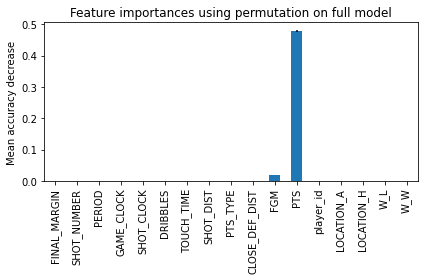

In [17]:
# Removed ID's and Game matchup string
features = data.drop(['SHOT_RESULT', 'GAME_ID', 'MATCHUP', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'player_name'], axis=1)
features['GAME_CLOCK'] = data['GAME_CLOCK'].apply(timeToSeconds)
features = pd.get_dummies(features)

plot_importance(features, labels)

Duration for forest importances: 22.199995279312134


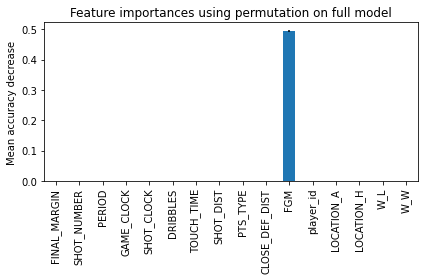

In [7]:
# Remove PTS, it looks completely correlated
features = data.drop(['PTS', 'SHOT_RESULT', 'GAME_ID', 'MATCHUP', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'player_name'], axis=1)
features['GAME_CLOCK'] = data['GAME_CLOCK'].apply(timeToSeconds)
features = pd.get_dummies(features)


plot_importance(features, labels)

Duration for forest importances: 88.8279287815094


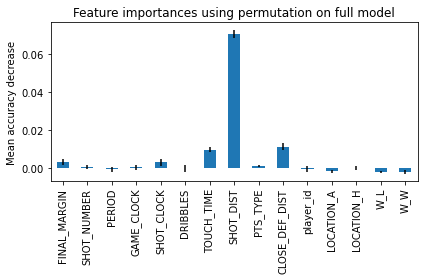

In [8]:
# Also remove FGM, it looks completely correlated
features = data.drop(['FGM', 'PTS', 'SHOT_RESULT', 'GAME_ID', 'MATCHUP', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'player_name'], axis=1)
features['GAME_CLOCK'] = data['GAME_CLOCK'].apply(timeToSeconds)
features = pd.get_dummies(features)


plot_importance(features, labels)

# Perform Feature Engineering

In [16]:
# begin to separate the data into features and labels
labels = data['SHOT_RESULT'].map(dict(made=1, missed=0))

### Try out keeping different features by running different cells
The model code should be based solely on feature_data to easily test different feature extractions

In [5]:
# drop_features = ['SHOT_RESULT', 'MATCHUP', 'GAME_ID', 'CLOSEST_DEFENDER','player_name', 'LOCATION', 'W', 'PTS', 'FGM']


In [6]:
# There are a lot more features we want to get rid of than use -- let's specify which ones we want to keep
# desired_features = ['SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST', 'LOCATION', 'W']

There are 21 features in our dataset, both categorical and numerical. The 'pts', and 'fgm' features are redundant for us, because they are non-zero (in the case of 'pts') and increasing (in the case of 'fgm') for made shots and zero and non-inreasing otherwise, so they essentially describes the 'shot_result' attribute we chose to be our label.

Additionally, there are a number of features such as 'player_id', 'player_name', 'closest_defender_player_id', 'closest_defender', 'location', and 'matchup' that seem like they might be valuable (i.e. some defenders are better and the resulting shot likelihood would be lower), but not valuable enough to enhance the accuracy of our classifier.

There are also features that describe the context of the game the shot was taken in such as 'game_clock', 'period', 'final_margin', 'W', 'game_id' that are not pertinent to the specific shot we are trying to predict.

There is a third class of features that we dropped originally that describe the game a specific shooter is having, such as 'shot_number' and 'FGM' that describe which shot of the game it is for a given player.

This left us with six features that describe only the specific situation a shot was taken in:

1.    shot_clock: The amount of time remaining in a possession. It figures that if there is only a small amount of time left, a player might rush to get a shot off.

2.    touch_time: The amount of time the ball is in our specific shooter's posession. It seems that the longer the ball is in a player's possession, the less likely they are to score because they didn't have a clear shot when they recieved the ball.

3.    dribbles: The amount of dribbles the player takes before shooting. Dribbling a lot might mean the player did not have a clear shot when he recieved the ball, resulting in a less likely shot.

4.    pts_type: Whether the shot was a 2 or 3 point field goal. It figures that because 3-pointers are taken farther from the basket, they might be harder to score.

5.    shot_dist: How far from the basket the shot was taken. The closer a player is to the basket, the easier it is to score.

6.    close_def_dist: How far the closest defender is. The closer the nearest defender, the more contested and harder to make a shot becomes.



In [16]:
# desired_features = ['SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST']

In [17]:
desired_features = ['SHOT_CLOCK', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']

In [9]:
# desired_features = [add desired features here]

In [18]:
# feature_data = data.drop(drop_features, axis=1)
feature_data = data.loc[:, desired_features]

# Reads game clock into seconds
# feature_data['GAME_CLOCK'] = data['GAME_CLOCK'].apply(timeToSeconds)

# One hot encodes any remaining categorical variables (like Location or W)
feature_data = pd.get_dummies(feature_data)

feature_data.head()

,SHOT_CLOCK,TOUCH_TIME,SHOT_DIST,CLOSE_DEF_DIST
0,10.8,1.9,7.7,1.3
1,3.4,0.8,28.2,6.1
3,10.3,1.9,17.2,3.4
4,10.9,2.7,3.7,1.1
5,9.1,4.4,18.4,2.6


# === Models ===

In [19]:
import sklearn as sk

# Tools
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Parallelism
from sklearn.utils import parallel_backend


## Decision Tree

In [30]:
# Essentially a playground for trying different parameters of decision trees
# These should probably be run with the cross validation of the cell below tbh, but these are just examples
train_features, test_features, train_labels, test_labels = sk.model_selection.train_test_split(feature_data, labels, test_size=0.20)

# use gini
classifier = DecisionTreeClassifier(criterion='gini')
classifier = classifier.fit(train_features, train_labels)
predictions = classifier.predict(test_features)
print('Accuracy on test data using Gini as split criterion is:', (sk.metrics.accuracy_score(test_labels, predictions)))
print()

# max depth
depth=4
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
classifier = classifier.fit(train_features, train_labels)
predictions = classifier.predict(test_features)
print('Accuracy on test data with max tree depth', depth, 'is:', (sk.metrics.accuracy_score(test_labels, predictions)))
print()

# minimum samples in a split set to 5
classifier = DecisionTreeClassifier(criterion='entropy', min_samples_split=5)
classifier = classifier.fit(train_features, train_labels)
predictions = classifier.predict(test_features)
print('Accuracy on test data with max tree minimum sample split 5 is:', (sk.metrics.accuracy_score(test_labels, predictions)))

Accuracy on test data using Gini as split criterion is: 0.5394881841557487

Accuracy on test data with max tree depth 4 is: 0.6142198277621321

Accuracy on test data with max tree minimum sample split 5 is: 0.5432431329333497


In [40]:
# Run cross validation with chosen hyperparameters

classifier = DecisionTreeClassifier(criterion='entropy', max_depth=10)
with parallel_backend('loky'):
    scores = cross_val_score(classifier, feature_data, labels, cv=5)
                                           
print("Average Accuracy:", scores.mean()*100)

Average Accuracy: 61.137773135457195


In [14]:
# Inner loop of nested cross validation - determine what are likely the best hyperparams

classifier = DecisionTreeClassifier()
params = {"max_depth": [5, 10, 15, 20],
          "min_samples_leaf": [5, 10, 15, 20],
          "max_features": [3, 4, 5, 6]}

grid_search = GridSearchCV(classifier, params, cv=5, scoring='accuracy')
with parallel_backend('loky'):
    grid_search.fit(feature_data, labels)

print(grid_search.best_params_)
print("Average Accuracy:", grid_search.best_score_*100)

{'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 10}
Average Accuracy: 61.434910228570416


In [15]:
# The Real Deal: Nested Cross Validation

with parallel_backend('loky'):
    scores = cross_val_score(grid_search, feature_data, labels, cv=10) 

print(grid_search.best_params_)
print("Average Accuracy:", scores.mean()*100)

{'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 10}
Average Accuracy: 61.446333110666515


## K Nearest Neighbors

Here we will explore the K nearest neighbors technique. This method is used to determine association based on the K nearest neighbors surrounding a data point. Based on this association, the prediction can be made based on classification of its neighbors.

In [17]:
scaler = sk.preprocessing.StandardScaler()
PCA = sk.decomposition.PCA()
knn = sk.neighbors.KNeighborsClassifier(n_neighbors=100)
pipe = Pipeline([('scaler' , scaler ), ('pca', PCA), ('knn', knn) ] )

with parallel_backend('loky'):
    accuracies = cross_val_score( pipe, feature_data, labels, cv=5)
    
print("Accuracies: ", accuracies.mean()*100)

Accuracies:  57.211308026577846


In [21]:
param_grid = {
    #'pca__n_components': list(range(5, 10)),
    'knn__n_neighbors': list(range(80, 120, 5))
}
gs = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

with parallel_backend('loky'):
    gs.fit(feature_data, labels)

print(gs.best_params_)
print(gs.best_score_)

duration = 7.195174217224121
{'knn__n_neighbors': 6}
0.5802353943071046


In [25]:
with parallel_backend('loky'):
    accuracies = cross_val_score( gs, feature_data, labels, cv=5)
print("Accuracies: ", accuracies.mean()*100)

Accuracies:  58.028437356576035


## Naive Bayes

In [26]:
# From the HW
classifier = GaussianNB()

# Cross validation accuracy
scores = cross_val_score(classifier, feature_data, labels, cv=10) 
print("Average Accuracy:", scores.mean()*100)

duration = 0.3098483085632324
Average Accuracy: 57.91334005220732


In [28]:
# Cross validation accuracy + other metrics
predictions = cross_val_predict(classifier, feature_data, labels, cv=10)

matrix = sk.metrics.confusion_matrix(labels, predictions)
report = sk.metrics.classification_report(labels, predictions)
print(report)

duration = 0.3035438060760498
              precision    recall  f1-score   support

           0       0.62      0.59      0.60     66622
           1       0.54      0.57      0.55     55880

    accuracy                           0.58    122502
   macro avg       0.58      0.58      0.58    122502
weighted avg       0.58      0.58      0.58    122502



## SVM

In [ ]:
scaler = sk.preprocessing.StandardScaler()
pca = sk.decomposition.PCA()
svc = SVC()
pipeline = Pipeline(steps=[('scaler', scaler), ('PCA', pca), ('SVC', svc)])

param_grid = {
    'PCA__n_components': list(range(2, 6)),
    'SVC__kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)

with parallel_backend('loky'):
    predictions = cross_val_predict(grid_search, feature_data, labels, cv=10)

avg_accuracy = sk.metrics.accuracy_score(labels, predictions)
print("Average Accuracy:", avg_accuracy*100)
report = sk.metrics.classification_report(labels, predictions)
print(report)

## Neural Network

With and without PCA seem to get the same results

In [9]:
# With PCA
scaler = sk.preprocessing.StandardScaler()
pca = sk.decomposition.PCA()
nn = MLPClassifier()
pipeline = Pipeline(steps=[('scaler', scaler), ('PCA', pca), ('NN', nn)])

num_features = feature_data.shape[1]
param_grid = {
    'PCA__n_components': list(range(2, num_features + 1)),
    'NN__hidden_layer_sizes': [(16, ), (32, ), (64, ), (128,)],
    'NN__activation': ['logistic', 'tanh', 'relu']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
with parallel_backend('loky'):
    grid_search.fit(feature_data, labels)

print(grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

{'NN__activation': 'relu', 'NN__hidden_layer_sizes': (64,), 'PCA__n_components': 4}
Best Accuracy: 0.6165041613461841


In [22]:
# Without PCA
scaler = sk.preprocessing.StandardScaler()
nn = MLPClassifier()
pipeline = Pipeline(steps=[('scaler', scaler), ('NN', nn)])

param_grid = {
    'NN__hidden_layer_sizes': [(16, ), (32, ), (64, ), (128,)],
    'NN__activation': ['logistic', 'tanh', 'relu']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
with parallel_backend('loky'):
    grid_search.fit(feature_data, labels)

print(grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

{'NN__activation': 'relu', 'NN__hidden_layer_sizes': (128,)}
Best Accuracy: 0.6170674149909748


In [11]:
# Performed without PCA
with parallel_backend('loky'):
    predictions = cross_val_predict(grid_search, feature_data, labels, cv=5)

avg_accuracy = sk.metrics.accuracy_score(labels, predictions)
print("Average Accuracy:", avg_accuracy*100)
report = sk.metrics.classification_report(labels, predictions)
print(report)

Average Accuracy: 61.735318607043155
              precision    recall  f1-score   support

           0       0.61      0.83      0.70     66622
           1       0.64      0.36      0.46     55880

    accuracy                           0.62    122502
   macro avg       0.63      0.60      0.58    122502
weighted avg       0.62      0.62      0.59    122502



## Random Forest

In [ ]:
classifier = RandomForestClassifier()

# Find the best hyperparamters for random forest
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'min_samples_split' : [2, 3, 4, 5, 6],
    'bootstrap' : [True, False]
}

# Train and test data
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

with parallel_backend('loky'):
    grid_search.fit(feature_data, labels)
    
# print best parameters
print(grid_search.best_params_)

with parallel_backend('loky'):
    predictions = cross_val_predict(grid_search, feature_data, labels, cv=5)

# print results
avg_accuracy = sk.metrics.accuracy_score(labels, predictions)
print("Average Accuracy:", avg_accuracy*100)
report = sk.metrics.classification_report(labels, predictions)
print(report)